# KPMG Virtual Internship on Data Analysis

In [2]:
#Importing requied packages
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print('Packages have been imported ✓')

Packages have been imported ✓


### Now, let's import the datasets

In [3]:
txn = pd.read_csv('/content/transactions.csv',header=1)
cust_add = pd.read_csv('/content/customer_address.csv',header=1)
new_cust = pd.read_csv('/content/new_customers.csv',header=1)
cust_demo = pd.read_csv('/content/customer_demographics.csv',header=1)
print('Datasets have been imported ✓')

Datasets have been imported ✓


## 1.Transaction Data

In [4]:
txn.head(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,2,2950,25-02-17,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,3,3120,21-05-17,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Dropping invalid columns
drop_cols = txn.loc[:,'Unnamed: 13':].columns.to_list()
txn.drop(labels=drop_cols,axis=1,inplace=True)

def check_shape(dataframe):
  rows = dataframe.shape[0]
  cols = dataframe.shape[1]
  print('Dataset: \nNumber of Records: {}\nNumber of Columns: {}'.format(rows,cols))

In [6]:
check_shape(txn)

Dataset: 
Number of Records: 12563
Number of Columns: 13


In [7]:
txn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12563 entries, 0 to 12562
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           12563 non-null  int64  
 1   product_id               12563 non-null  int64  
 2   customer_id              12563 non-null  int64  
 3   transaction_date         12563 non-null  object 
 4   online_order             12349 non-null  object 
 5   order_status             12563 non-null  object 
 6   brand                    12448 non-null  object 
 7   product_line             12448 non-null  object 
 8   product_class            12448 non-null  object 
 9   product_size             12448 non-null  object 
 10  list_price               12563 non-null  float64
 11  standard_cost            12448 non-null  object 
 12  product_first_sold_date  12448 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 1.2+ MB


In [8]:
# Count of unique customer ids
print(len(txn.customer_id.unique()))

txn.describe()

3423


,transaction_id,product_id,customer_id,list_price,product_first_sold_date
count,12563.000000,12563.000000,12563.000000,12563.000000,12448.000000
mean,6282.000000,45.747751,1736.747115,1107.978163,38181.222445
std,3626.770051,30.653475,1014.956260,581.810293,2870.504285
min,1.000000,0.000000,1.000000,12.010000,33259.000000
25%,3141.500000,18.000000,851.000000,586.450000,35560.000000
50%,6282.000000,45.000000,1726.000000,1163.890000,38216.000000
75%,9422.500000,73.000000,2620.000000,1635.300000,40672.000000
max,12563.000000,100.000000,5034.000000,2091.470000,42710.000000


In [9]:
obj_cols = txn.select_dtypes(np.object).columns.to_list()
for col in obj_cols:
  print('Column Name: ',col,'\n')
  print('---------------------------------------')
  print(txn[col].value_counts())
  print('---------------------------------------')

Column Name:  transaction_date 

---------------------------------------
14-02-17    53
19-12-17    53
15-10-17    50
16-10-17    49
18-12-17    48
            ..
23-04-17    23
31-03-17    21
06-06-17    21
19-10-17    18
25-09-17    14
Name: transaction_date, Length: 364, dtype: int64
---------------------------------------
Column Name:  online_order 

---------------------------------------
False    6206
True     6143
Name: online_order, dtype: int64
---------------------------------------
Column Name:  order_status 

---------------------------------------
Approved     12436
Cancelled      127
Name: order_status, dtype: int64
---------------------------------------
Column Name:  brand 

---------------------------------------
Solex             2652
Giant Bicycles    2102
WeareA2B          2057
OHM Cycles        1928
Trek Bicycles     1873
Norco Bicycles    1836
Name: brand, dtype: int64
---------------------------------------
Column Name:  product_line 

---------------------------

Cost should have been a numeric column, because of currency symbol it is Object

In [10]:
null_cols = txn.isnull().sum().to_frame('Count')
null_cols[null_cols.Count>0].shape[0]

7

There are 7 columns out of 13 with missing values

In [11]:
txn.describe()

,transaction_id,product_id,customer_id,list_price,product_first_sold_date
count,12563.000000,12563.000000,12563.000000,12563.000000,12448.000000
mean,6282.000000,45.747751,1736.747115,1107.978163,38181.222445
std,3626.770051,30.653475,1014.956260,581.810293,2870.504285
min,1.000000,0.000000,1.000000,12.010000,33259.000000
25%,3141.500000,18.000000,851.000000,586.450000,35560.000000
50%,6282.000000,45.000000,1726.000000,1163.890000,38216.000000
75%,9422.500000,73.000000,2620.000000,1635.300000,40672.000000
max,12563.000000,100.000000,5034.000000,2091.470000,42710.000000


Values in the product_first_sold_date column are invalid

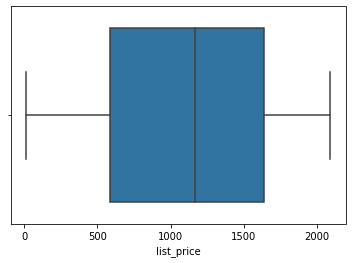

In [12]:
sns.boxplot(txn.list_price)
plt.show()

In [13]:
txn.transaction_date = pd.to_datetime(txn.transaction_date)
txn['txn_year'] = txn['transaction_date'].dt.year
txn['txn_month'] = txn['transaction_date'].dt.month
txn['txn_date'] = txn['transaction_date'].dt.day

In [14]:
print('Year:',txn.txn_year.value_counts())

Year: 2017    12563
Name: txn_year, dtype: int64


In [15]:
print('Month:',txn.txn_month.value_counts())

Month: 8     1122
10    1098
11    1066
5     1053
7     1052
12    1047
1     1033
6     1031
3     1029
9     1018
4     1009
2     1005
Name: txn_month, dtype: int64


In [16]:
txn.isna().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               214
order_status                 0
brand                      115
product_line               115
product_class              115
product_size               115
list_price                   0
standard_cost              115
product_first_sold_date    115
txn_year                     0
txn_month                    0
txn_date                     0
dtype: int64

In [17]:
txn.dropna(axis=0,inplace=True)

In [18]:
check_shape(txn)

Dataset: 
Number of Records: 12235
Number of Columns: 16


In [19]:
cust_ids_t = txn.customer_id.value_counts().to_frame('Count')
cust_ids_t[cust_ids_t.Count==1].sum()

Count    354
dtype: int64

In [20]:
txn.head(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,txn_year,txn_month,txn_date
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,$53.62,41245.0,2017,2,25
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,$388.92,41701.0,2017,5,21
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,$248.82,36361.0,2017,10,16


In [21]:
# Let's replace $ in standard_cost column
import re
pattern = r'[$,]'

In [22]:
txn['standard_cost'] = txn['standard_cost'].apply(lambda x: re.sub(pattern,'',x))
txn['standard_cost'].astype(float) 

0          53.62
1         388.92
2         248.82
3         381.10
4         709.48
          ...   
12558     582.48
12559     598.76
12560     333.18
12561    1105.75
12562     675.03
Name: standard_cost, Length: 12235, dtype: float64

In [23]:
txn.drop(labels=['product_first_sold_date'],axis=1,inplace=True)

## 2.Customer Address

In [24]:
cust_add.head(3)

,customer_id,address,postcode,state,country,property_valuation,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,060 Morning Avenue,2016,New South Wales,Australia,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,0 Holy Cross Court,4211,QLD,Australia,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
cust_ids = cust_add.customer_id.value_counts().to_frame('Count')
cust_ids[cust_ids.Count==1].count()

Count    3999
dtype: int64

In [26]:
drop_cols_CA = cust_add.loc[:,'Unnamed: 6':].columns.to_list()
cust_add.drop(labels=drop_cols_CA,axis=1,inplace=True)

In [27]:
cust_add.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [28]:
len(cust_add.customer_id.unique())

3999

In [29]:
cust_add.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [30]:
cust_add.isna().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [31]:
cust_add.head(3)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9


In [32]:
cust_add.state.value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [33]:
cust_add.drop(labels=['address','country'],axis=1,inplace=True)

In [34]:
cust_add.head(3)

,customer_id,postcode,state,property_valuation
0,1,2016,New South Wales,10
1,2,2153,New South Wales,10
2,4,4211,QLD,9


## 3.Customer Demographics

In [35]:
cust_demo.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,01-Feb,Yes,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
drop_cols_CD = cust_demo.loc[:,'Unnamed: 13':].columns.to_list()
cust_demo.drop(labels=drop_cols_CD,axis=1,inplace=True)

In [37]:
cust_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [38]:
len(cust_demo.customer_id.unique())

4000

In [39]:
obj_cols_CD = cust_demo.select_dtypes(np.object).columns.to_list()
for col in obj_cols_CD:
  print('Column Name: ',col,'\n')
  print('---------------------------------------')
  print(cust_demo[col].value_counts())
  print('---------------------------------------')

Column Name:  first_name 

---------------------------------------
Max          5
Tobe         5
Timmie       5
Corabelle    4
Osgood       4
            ..
Kalli        1
Orrin        1
Arte         1
Rolfe        1
Mina         1
Name: first_name, Length: 3139, dtype: int64
---------------------------------------
Column Name:  last_name 

---------------------------------------
Ramsdell      3
Pristnor      3
Linn          2
Bertelmot     2
Baudichon     2
             ..
Arrington     1
Reese         1
Caldecot      1
Champerlen    1
Andryushin    1
Name: last_name, Length: 3725, dtype: int64
---------------------------------------
Column Name:  gender 

---------------------------------------
Female    2037
Male      1872
U           88
F            1
M            1
Femal        1
Name: gender, dtype: int64
---------------------------------------
Column Name:  DOB 

---------------------------------------
1978-01-30    7
1962-12-17    4
1976-07-16    4
1964-07-08    4
1977-05-13   

- Gender column has inconsistent values
- default column has invalid data
- DOB should be a datetime column / timestamp

In [40]:
null_cols_CD = cust_demo.isnull().sum().to_frame('Count')
null_cols_CD[null_cols_CD.Count>0].shape[0]

6

There are 6 columns in the customer demographics datasets

In [41]:
cust_ids_CD = cust_demo.customer_id.value_counts().to_frame('Count')


In [42]:
cust_demo.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [43]:
cust_demo.shape

(4000, 13)

In [44]:
cust_demo.drop(labels=['first_name','last_name','default'],axis=1,inplace=True)

In [45]:
cust_demo['tenure'].fillna(value='mean',inplace=True)

In [46]:
cust_demo['DOB'].value_counts()

1978-01-30    7
1962-12-17    4
1976-07-16    4
1964-07-08    4
1977-05-13    4
             ..
1962-06-27    1
1975-12-17    1
1978-01-10    1
1975-01-11    1
1996-04-06    1
Name: DOB, Length: 3448, dtype: int64

In [47]:
cust_demo.dropna(axis=0,inplace=True)
cust_demo.DOB = pd.to_datetime(cust_demo['DOB'])
cust_demo['DOB_year'] = cust_demo['DOB'].dt.year
cust_demo['DOB_month'] = cust_demo['DOB'].dt.month
cust_demo['DOB_date'] = cust_demo['DOB'].dt.day
# Let's fix data issues in Gender column
cust_demo['gender'] = cust_demo['gender'].map({'Male':'M','Female':'F','Femal':'F','F':'F','U':'U'})
# Let's calculate Age upto date
cust_demo['Age'] = 2021 - cust_demo['DOB_year']
# Let's remove invalid date
cust_demo = cust_demo[(cust_demo["deceased_indicator"] != 'Y') & (cust_demo["Age"] != 178)]

In [48]:
cust_demo.head()

,customer_id,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,DOB_year,DOB_month,DOB_date,Age
0,1,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11,1953,10,12,68
1,2,M,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16,1980,12,16,41
2,3,M,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15,1954,1,20,67
8,9,F,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8,1973,3,10,48
9,10,F,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20,1988,10,11,33


In [49]:
#Binning the Age column
cut_labels = ['0-10', '11-20', '21-30', '31-40','41-50','51-60','61-70','71-80','81-90','91-100']
cut_bins = [0, 10,20,30,40,50,60,70,80,90,100]
cust_demo['Age_Group'] = pd.cut(cust_demo['Age'], bins=cut_bins, labels=cut_labels)
#cust_demo['Age_Group'].value_counts()

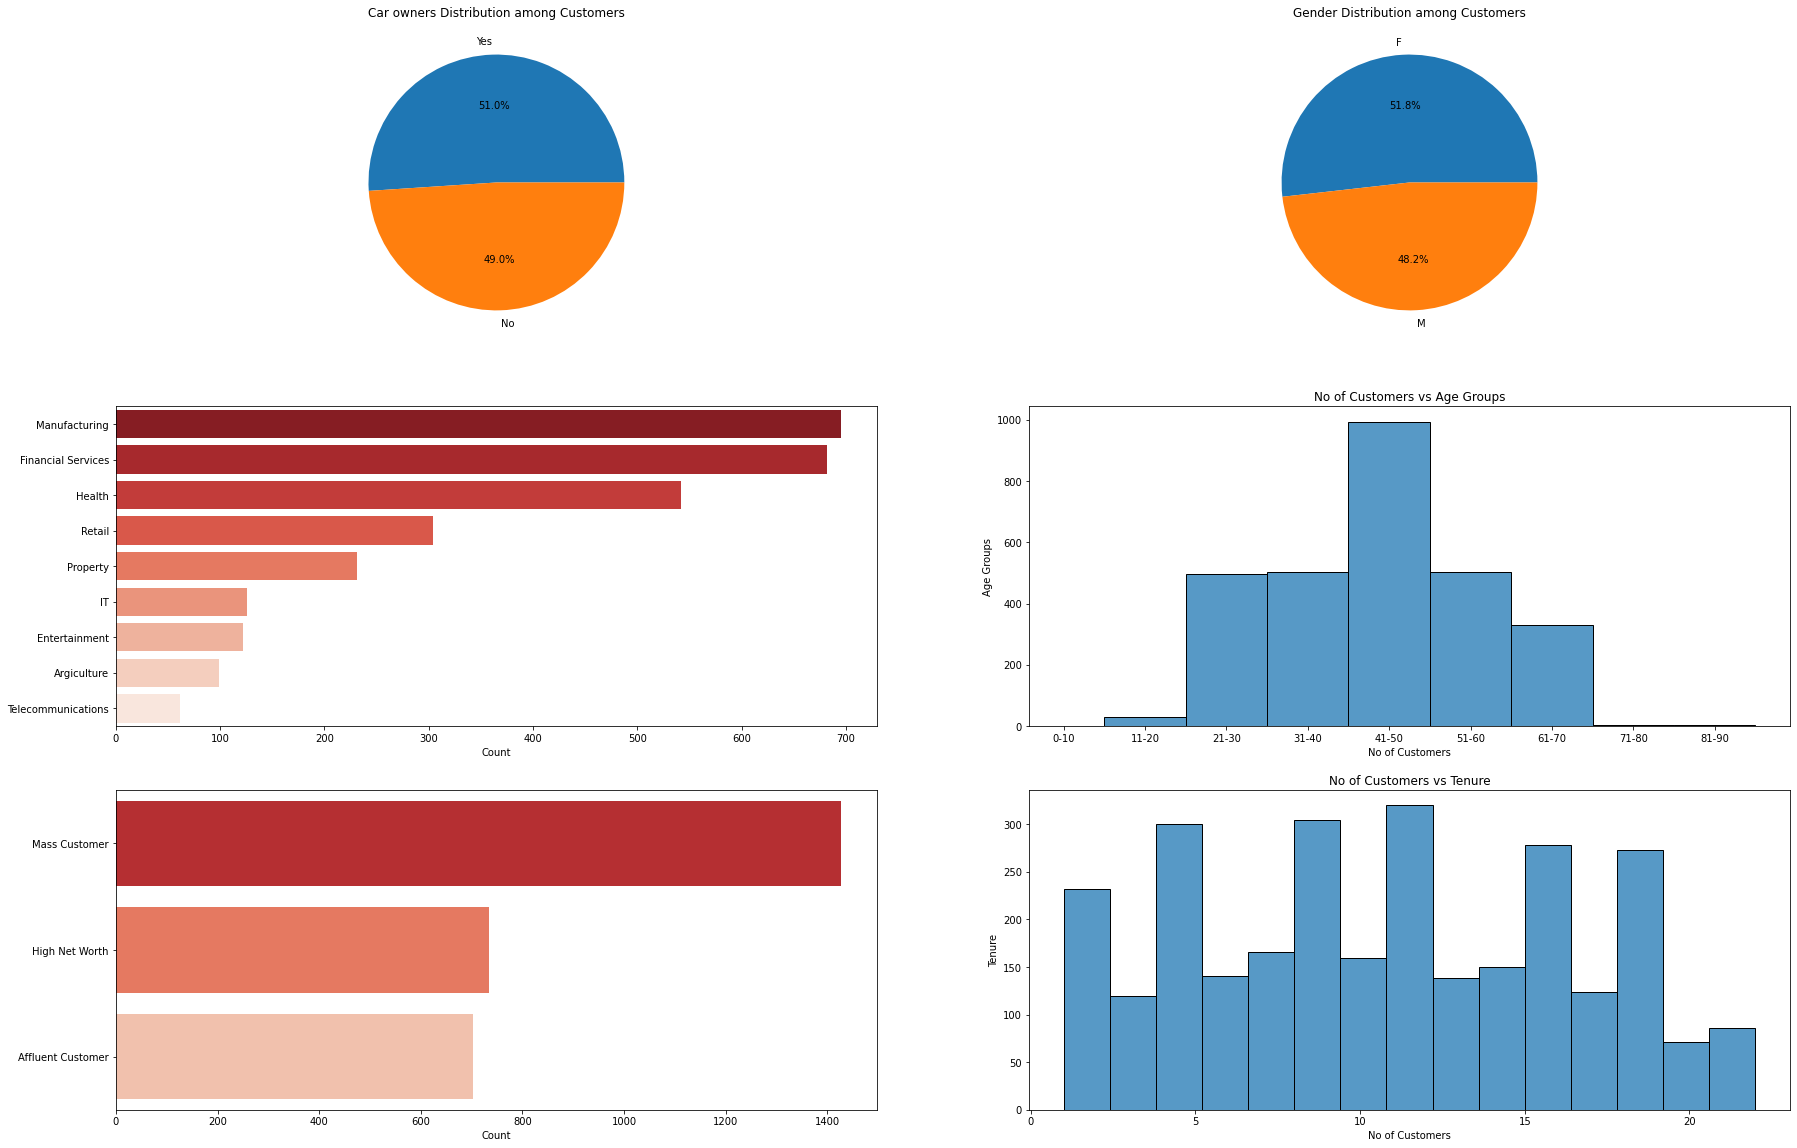

In [50]:
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
CAR = cust_demo.owns_car.value_counts(normalize=True).rename_axis('car').reset_index(name='Count')
plt.pie(data=CAR, x=CAR.Count, labels=CAR.car, autopct='%1.1f%%')
plt.title('Car owners Distribution among Customers')
plt.subplot(3,2,2)
GENDER = cust_demo.gender.value_counts(normalize=True).rename_axis('gender').reset_index(name='Count')
plt.pie(data=GENDER, x=GENDER.Count, labels=GENDER.gender, autopct='%1.1f%%')
plt.title('Gender Distribution among Customers')
plt.subplot(3,2,4)
AGE = cust_demo.Age_Group
sns.histplot(AGE,palette='Blues').set(xlabel='No of Customers', ylabel='Age Groups', title='No of Customers vs Age Groups')
plt.subplot(3,2,3)
JOB = cust_demo.job_industry_category.value_counts().to_frame('Count')
sns.barplot(JOB.Count,JOB.index,orientation='horizontal',palette='Reds_r')
plt.subplot(3,2,5)
WEALTH = cust_demo.wealth_segment.value_counts().to_frame('Count')
sns.barplot(WEALTH.Count,WEALTH.index,orientation='horizontal',palette='Reds_r')
plt.subplot(3,2,6)
AGE = cust_demo.tenure
sns.histplot(AGE,palette='Blues').set(xlabel='No of Customers', ylabel='Tenure', title='No of Customers vs Tenure')
plt.show()

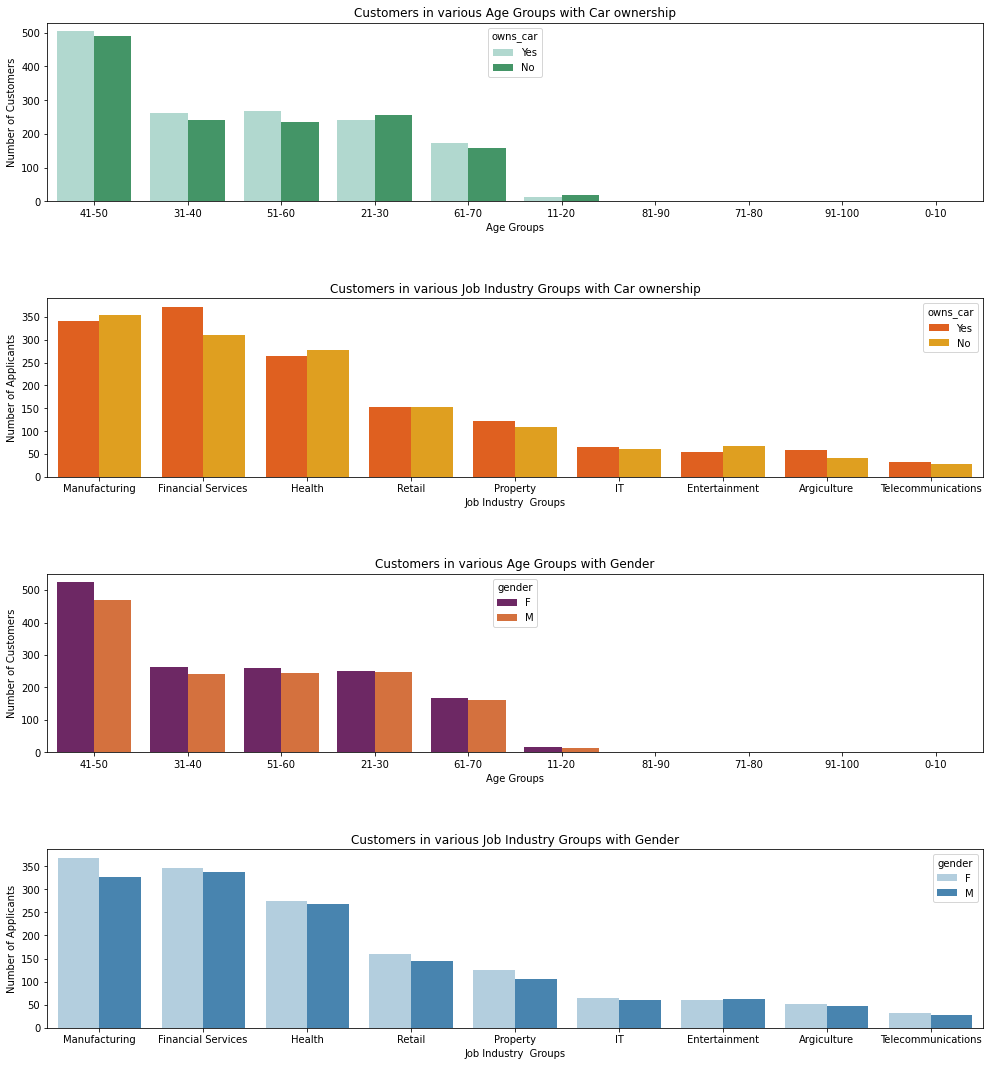

In [51]:
plt.figure(figsize=[15,16])
plt.yscale('log')
plt.subplot(411)
sns.countplot(data = cust_demo, x='Age_Group' , order=cust_demo['Age_Group'].value_counts().index,hue = cust_demo['owns_car'],palette='BuGn',orient='h').set(xlabel='Age Groups', ylabel='Number of Customers', title='Customers in various Age Groups with Car ownership')
plt.subplot(412)
sns.countplot(data = cust_demo, x='job_industry_category' , order=cust_demo['job_industry_category'].value_counts().index,hue = cust_demo['owns_car'],palette='autumn',orient='h').set(xlabel='Job Industry  Groups', ylabel='Number of Applicants', title='Customers in various Job Industry Groups with Car ownership')
plt.subplot(413)
sns.countplot(data = cust_demo, x='Age_Group' , order=cust_demo['Age_Group'].value_counts().index,hue = cust_demo['gender'],palette='inferno',orient='h').set(xlabel='Age Groups', ylabel='Number of Customers', title='Customers in various Age Groups with Gender')
plt.subplot(414)
sns.countplot(data = cust_demo, x='job_industry_category' , order=cust_demo['job_industry_category'].value_counts().index,hue = cust_demo['gender'],palette='Blues',orient='h').set(xlabel='Job Industry  Groups', ylabel='Number of Applicants', title='Customers in various Job Industry Groups with Gender')
plt.tight_layout(5.0)
plt.show()

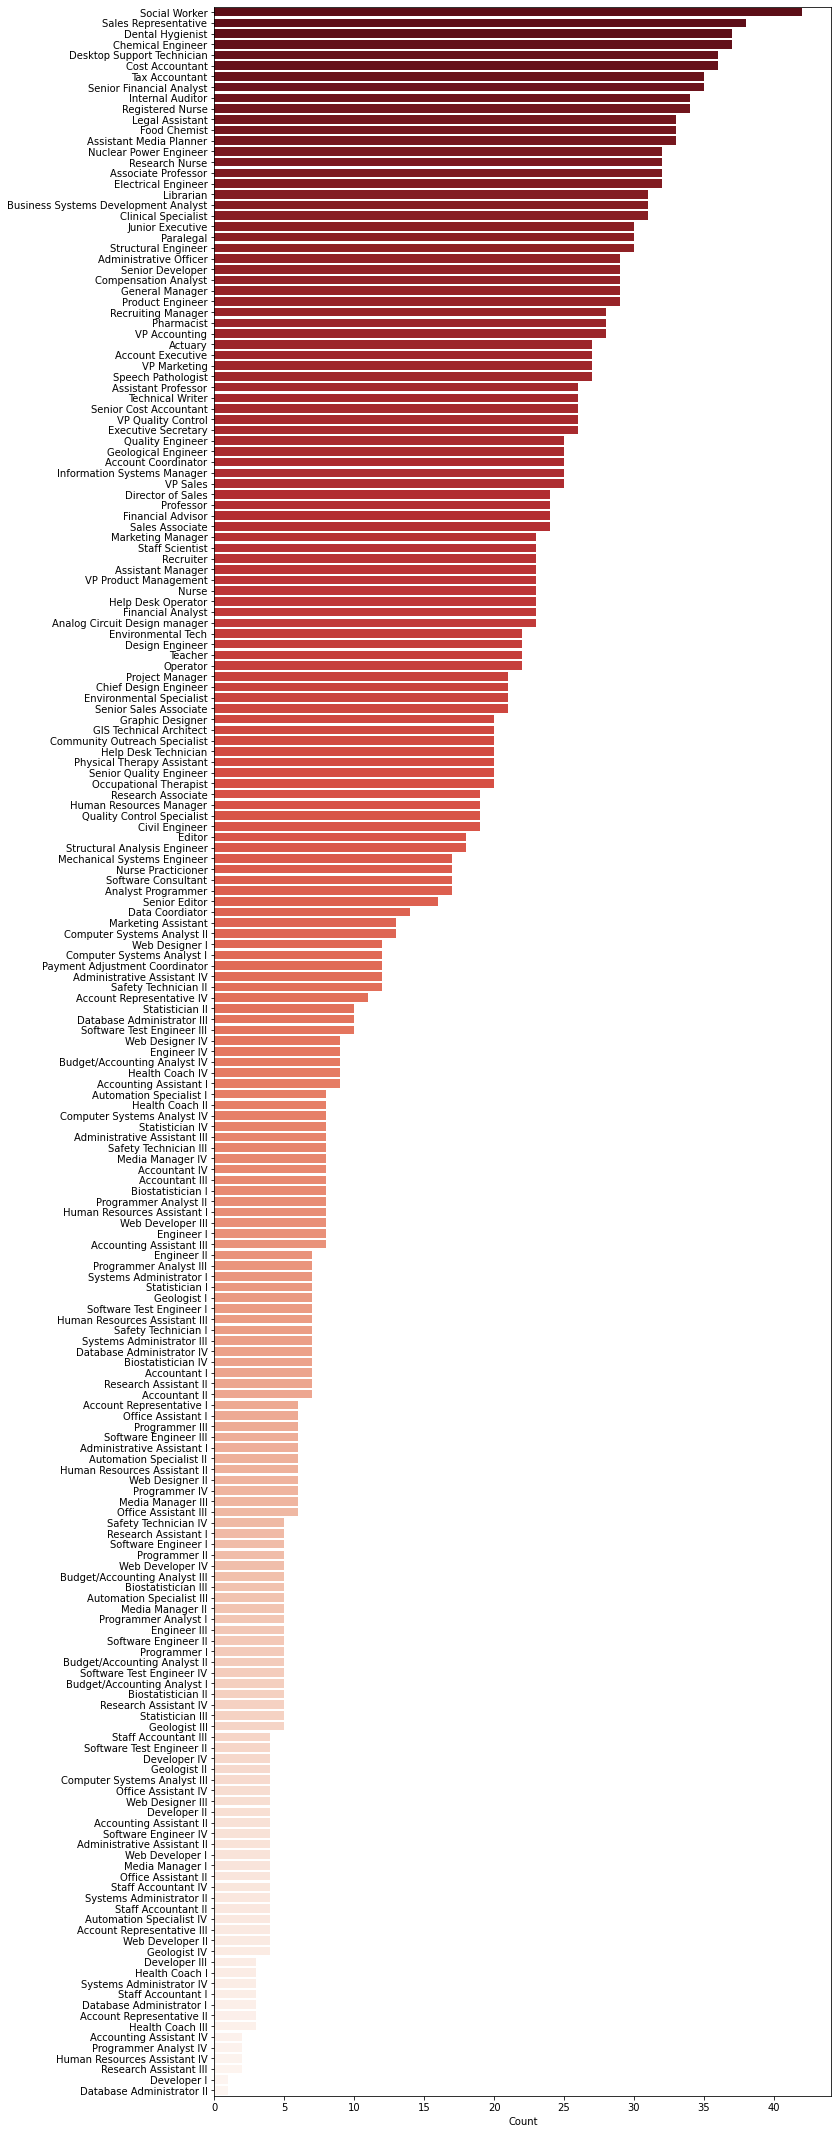

In [52]:
plt.figure(figsize=(12,30))
WEALTH = cust_demo.job_title.value_counts().to_frame('Count')
sns.barplot(WEALTH.Count,WEALTH.index,orientation='horizontal',palette='Reds_r')
plt.tight_layout(2.0)
plt.show()

In [53]:
df = pd.merge(txn,cust_add,how='inner',on='customer_id')

In [54]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,txn_year,txn_month,txn_date,postcode,state,property_valuation
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2017,2,25,3064,VIC,6
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2017,10,16,3064,VIC,6
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2017,5,21,2196,NSW,5
3,6862,4,3120,2017-05-10,False,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2017,5,10,2196,NSW,5
4,9155,91,3120,2017-10-30,True,Approved,Solex,Standard,medium,medium,100.35,75.26,2017,10,30,2196,NSW,5


In [55]:
df = pd.merge(df,cust_demo,how='inner',on='customer_id')

In [56]:
print('Customer Demographics DataFrame Dimension:',cust_demo.shape)
print('Transaction DataFrame Dimension          :',txn.shape)
print('Customer Address DataFrame Dimension     :',cust_add.shape)
print('Final DataFrame Dimension                :',df.shape)

Customer Demographics DataFrame Dimension: (2862, 15)
Transaction DataFrame Dimension          : (12235, 15)
Customer Address DataFrame Dimension     : (3999, 4)
Final DataFrame Dimension                : (8842, 32)


In [57]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,txn_year,txn_month,txn_date,postcode,state,property_valuation,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,DOB_year,DOB_month,DOB_date,Age,Age_Group
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,2017,2,25,3064,VIC,6,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,1955,1,11,66,61-70
1,11065,1,2950,2017-10-16,False,Approved,Giant Bicycles,Standard,medium,medium,1403.50,954.82,2017,10,16,3064,VIC,6,M,19,1955-01-11,Software Engineer I,Financial Services,Mass Customer,N,Yes,10,1955,1,11,66,61-70
2,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2017,5,21,2196,NSW,5,F,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10,1979,2,4,42,41-50
3,6862,4,3120,2017-05-10,False,Approved,Giant Bicycles,Standard,high,medium,1129.13,677.48,2017,5,10,2196,NSW,5,F,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10,1979,2,4,42,41-50
4,9155,91,3120,2017-10-30,True,Approved,Solex,Standard,medium,medium,100.35,75.26,2017,10,30,2196,NSW,5,F,89,1979-02-04,Clinical Specialist,Health,Mass Customer,N,Yes,10,1979,2,4,42,41-50


In [58]:
drop_col = ['txn_year','transaction_id','product_id','customer_id','transaction_date','DOB','deceased_indicator']

In [59]:
df_init = df.copy()
df.drop(labels=drop_col,axis=1,inplace=True)

In [60]:
num_col = df.select_dtypes([int,float]).columns.tolist()

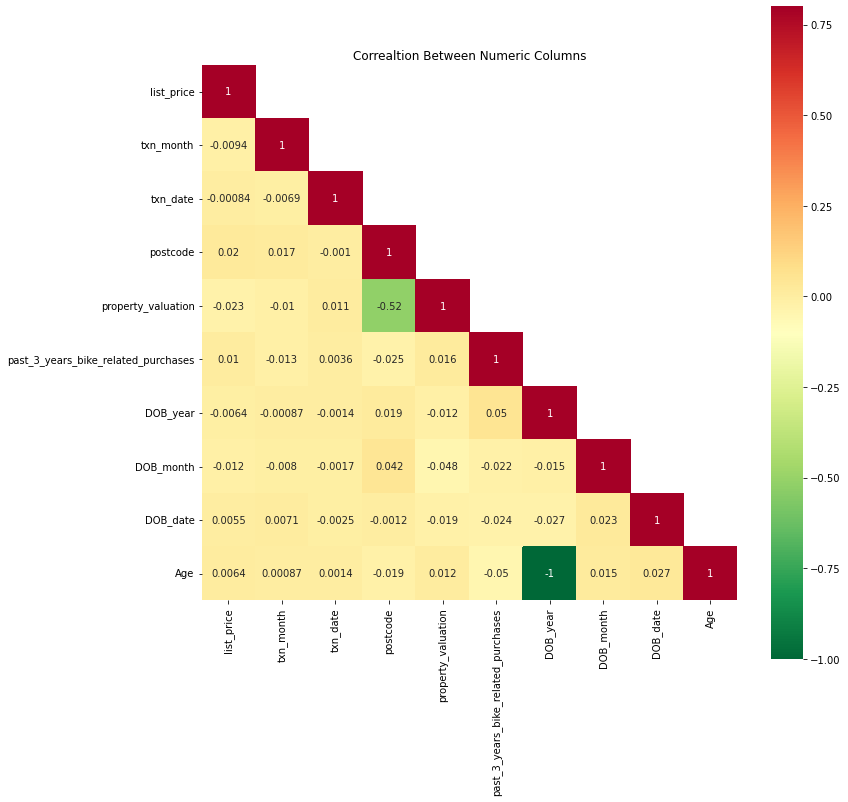

In [61]:
#Firstly, creating the correlation matrix
corr_mat = df[num_col].corr()
corr_mat_mask = np.array(corr_mat)
#Creating a heatmap
corr_mat_mask[np.tril_indices_from(corr_mat)] = False
plt.figure(figsize=[12,12])
sns.heatmap(corr_mat, mask=corr_mat_mask, vmax=.8, square=True, annot=True, cmap='RdYlGn_r').set(title='Correaltion Between Numeric Columns');
plt.show()

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8842 entries, 0 to 8841
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   online_order                         8842 non-null   object  
 1   order_status                         8842 non-null   object  
 2   brand                                8842 non-null   object  
 3   product_line                         8842 non-null   object  
 4   product_class                        8842 non-null   object  
 5   product_size                         8842 non-null   object  
 6   list_price                           8842 non-null   float64 
 7   standard_cost                        8842 non-null   object  
 8   txn_month                            8842 non-null   int64   
 9   txn_date                             8842 non-null   int64   
 10  postcode                             8842 non-null   int64   
 11  state            

In [63]:
#to numeric -> tenure, standard_cost
df['tenure'] = df['tenure'].astype(int)
df['standard_cost'] = df['standard_cost'].astype(float)

In [64]:
#to Obj -> Postcode
df['postcode'] = df['postcode'].astype(np.object)

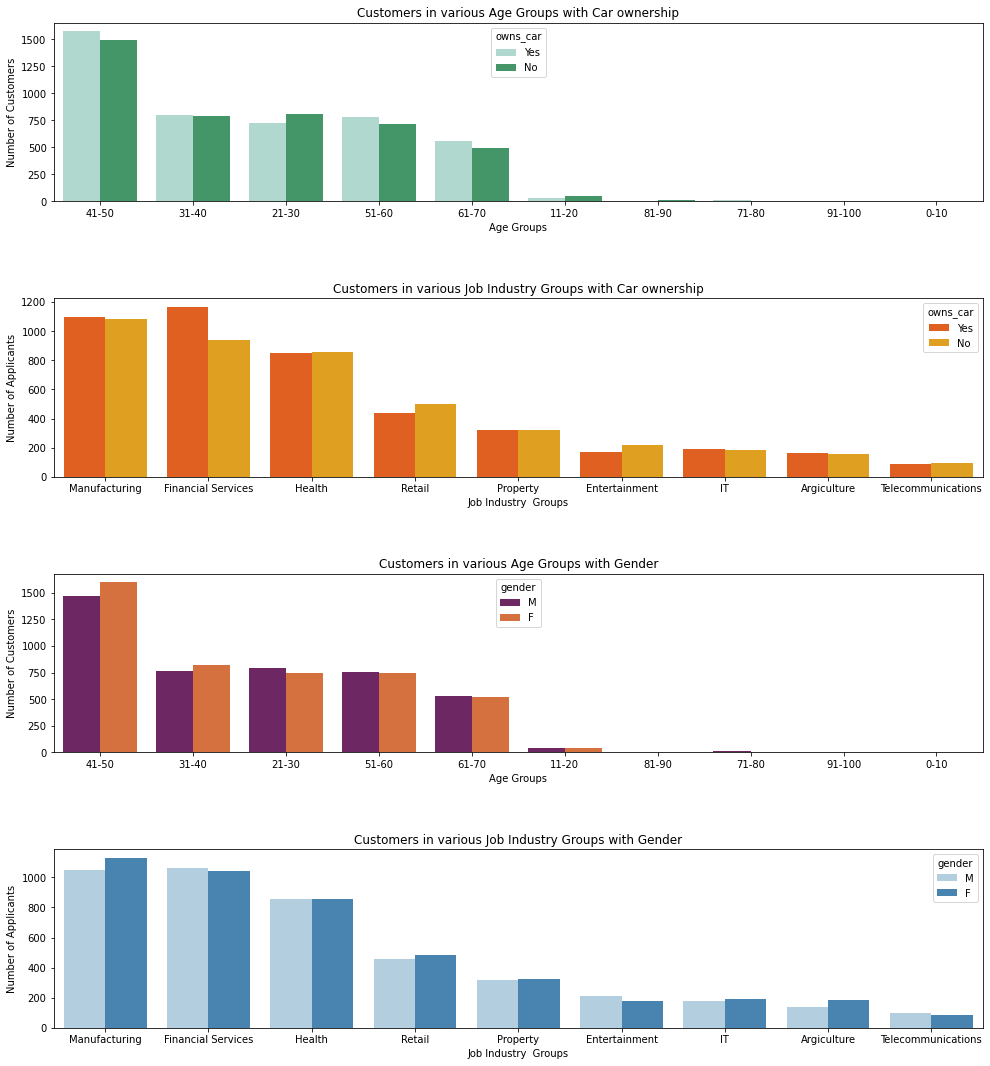

In [65]:
plt.figure(figsize=[15,16])
plt.yscale('log')
plt.subplot(411)
sns.countplot(data = df, x='Age_Group' , order=df['Age_Group'].value_counts().index,hue = df['owns_car'],palette='BuGn',orient='h').set(xlabel='Age Groups', ylabel='Number of Customers', title='Customers in various Age Groups with Car ownership')
plt.subplot(412)
sns.countplot(data = df, x='job_industry_category' , order=df['job_industry_category'].value_counts().index,hue = df['owns_car'],palette='autumn',orient='h').set(xlabel='Job Industry  Groups', ylabel='Number of Applicants', title='Customers in various Job Industry Groups with Car ownership')
plt.subplot(413)
sns.countplot(data = df, x='Age_Group' , order=df['Age_Group'].value_counts().index,hue = df['gender'],palette='inferno',orient='h').set(xlabel='Age Groups', ylabel='Number of Customers', title='Customers in various Age Groups with Gender')
plt.subplot(414)
sns.countplot(data = df, x='job_industry_category' , order=df['job_industry_category'].value_counts().index,hue = df['gender'],palette='Blues',orient='h').set(xlabel='Job Industry  Groups', ylabel='Number of Applicants', title='Customers in various Job Industry Groups with Gender')
plt.tight_layout(5.0)
plt.show()

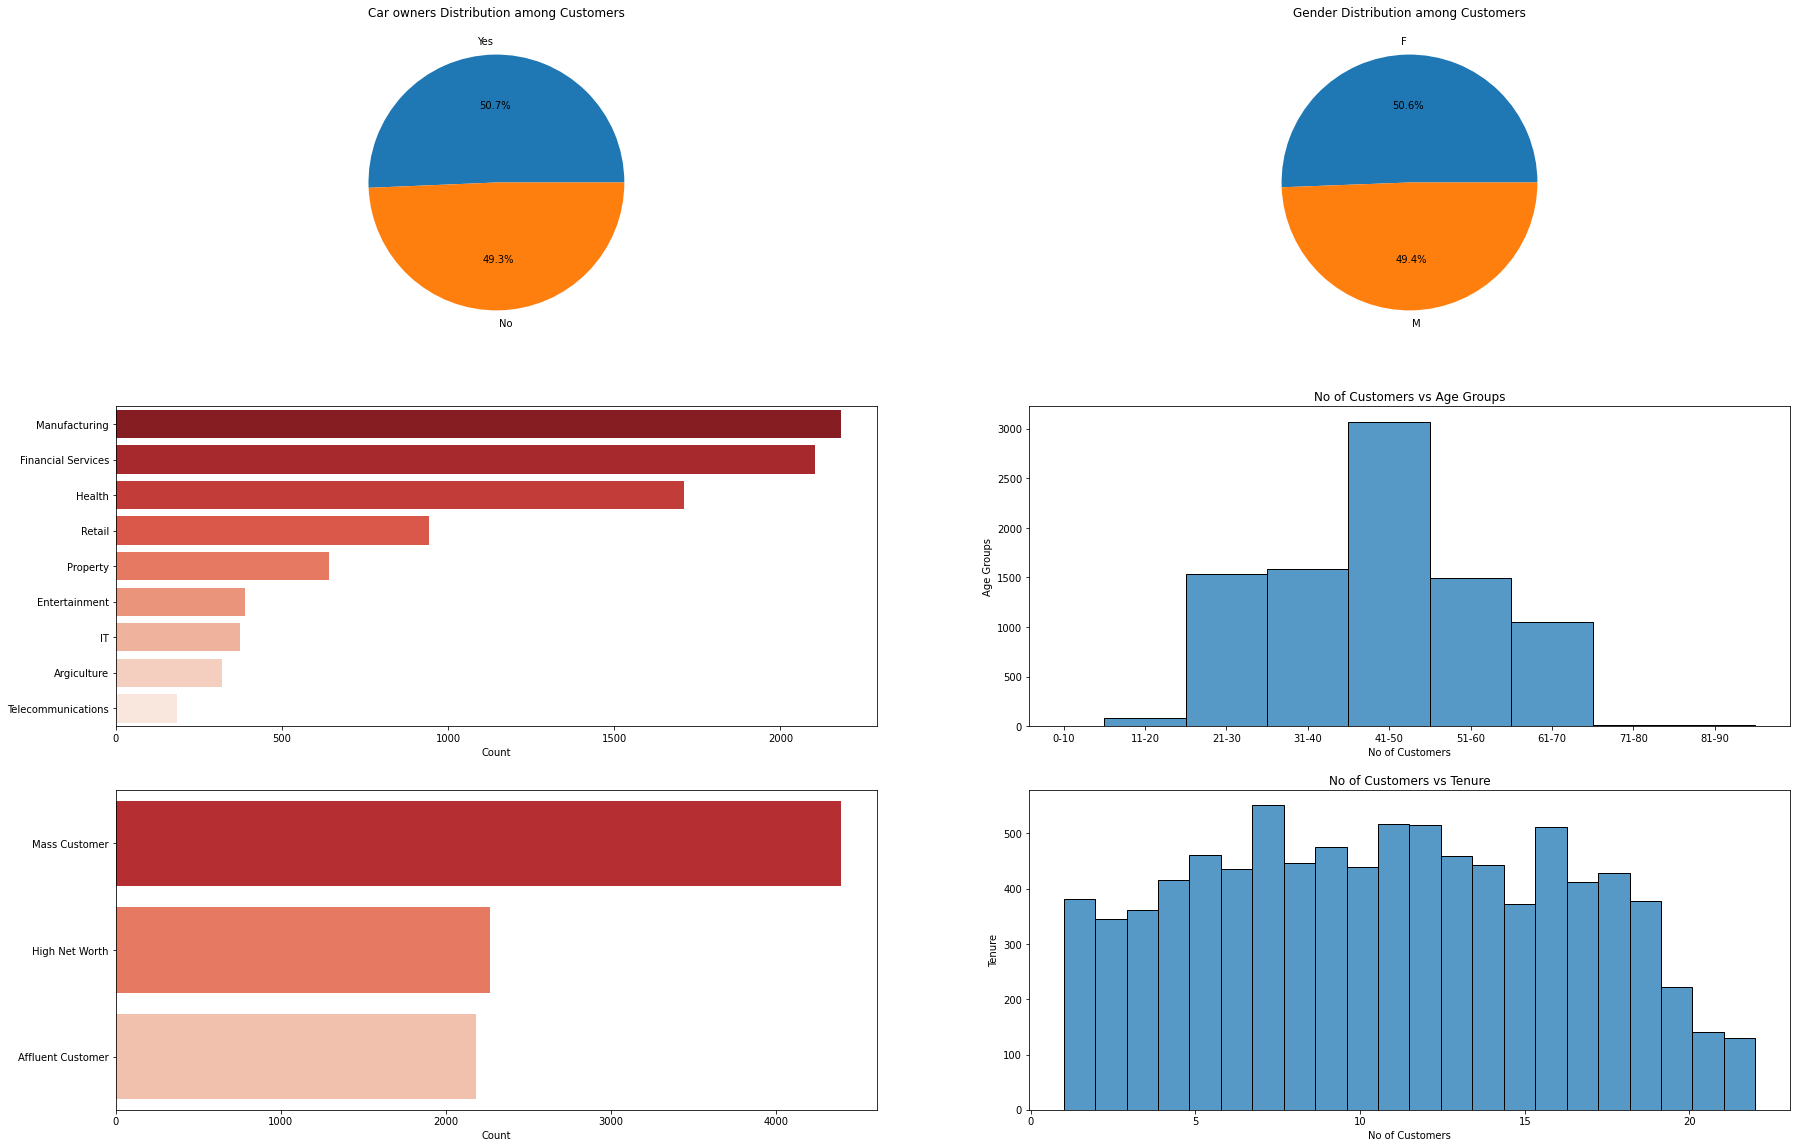

In [66]:
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
CAR = df.owns_car.value_counts(normalize=True).rename_axis('car').reset_index(name='Count')
plt.pie(data=CAR, x=CAR.Count, labels=CAR.car, autopct='%1.1f%%')
plt.title('Car owners Distribution among Customers')
plt.subplot(3,2,2)
GENDER = df.gender.value_counts(normalize=True).rename_axis('gender').reset_index(name='Count')
plt.pie(data=GENDER, x=GENDER.Count, labels=GENDER.gender, autopct='%1.1f%%')
plt.title('Gender Distribution among Customers')
plt.subplot(3,2,4)
AGE = df.Age_Group
sns.histplot(AGE,palette='Blues').set(xlabel='No of Customers', ylabel='Age Groups', title='No of Customers vs Age Groups')
plt.subplot(3,2,3)
JOB = df.job_industry_category.value_counts().to_frame('Count')
sns.barplot(JOB.Count,JOB.index,orientation='horizontal',palette='Reds_r')
plt.subplot(3,2,5)
WEALTH = df.wealth_segment.value_counts().to_frame('Count')
sns.barplot(WEALTH.Count,WEALTH.index,orientation='horizontal',palette='Reds_r')
plt.subplot(3,2,6)
AGE = df.tenure
sns.histplot(AGE,palette='Blues').set(xlabel='No of Customers', ylabel='Tenure', title='No of Customers vs Tenure')
plt.show()

# Modelling

Label Encoding

In [67]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [68]:
obj_col = df.select_dtypes([np.object, 'category']).columns.tolist()
le = LabelEncoder()
for col in obj_col:
  df[col] = le.fit_transform(df[col])

In [69]:
df.head()

,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,txn_month,txn_date,postcode,state,property_valuation,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,DOB_year,DOB_month,DOB_date,Age,Age_Group
0,0,0,3,2,2,1,71.49,53.62,2,25,386,3,6,1,19,155,2,2,1,10,1955,1,11,66,5
1,0,0,0,2,2,1,1403.50,954.82,10,16,386,3,6,1,19,155,2,2,1,10,1955,1,11,66,5
2,1,0,4,2,2,0,2091.47,388.92,5,21,136,0,5,0,89,42,3,2,1,10,1979,2,4,42,3
3,0,0,0,2,0,1,1129.13,677.48,5,10,136,0,5,0,89,42,3,2,1,10,1979,2,4,42,3
4,1,0,3,2,2,1,100.35,75.26,10,30,136,0,5,0,89,42,3,2,1,10,1979,2,4,42,3


In [70]:
mms = MinMaxScaler()
#for col in df.columns:
  
df_train = mms.fit_transform(df)

In [71]:
from sklearn.cluster import KMeans

In [72]:
cls = KMeans()
cls.fit(df_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

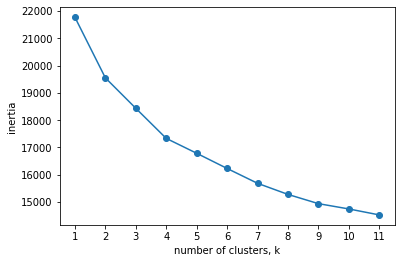

In [115]:
ks = range(1, 12)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(df_train)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [116]:
# Create a KMeans model with 8 clusters: model
model = KMeans(n_clusters=11,random_state=43)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(df_train)


In [117]:
df['Segment'] = labels

In [118]:
df.head()

,labels,Customers,Segment
0,1,2950,2
1,1,2950,2
2,0,3120,3
3,0,3120,4
4,0,3120,3


In [119]:
centroids = model.cluster_centers_

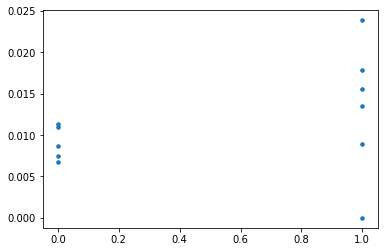

In [120]:
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='.',s=50)
plt.show()

In [121]:
df = pd.DataFrame({'labels': labels, 'Customers': df_init.customer_id})

# Display df sorted by cluster label
print(df.sort_values(by='labels'))

      labels  Customers
5864       0       1372
5953       0       1660
5952       0       1660
6634       0       3437
5946       0        697
...      ...        ...
4565      10       2329
2299      10        637
2300      10        637
4553      10        440
6452      10       3174

[8842 rows x 2 columns]


In [122]:
df_init['Cluster'] = labels

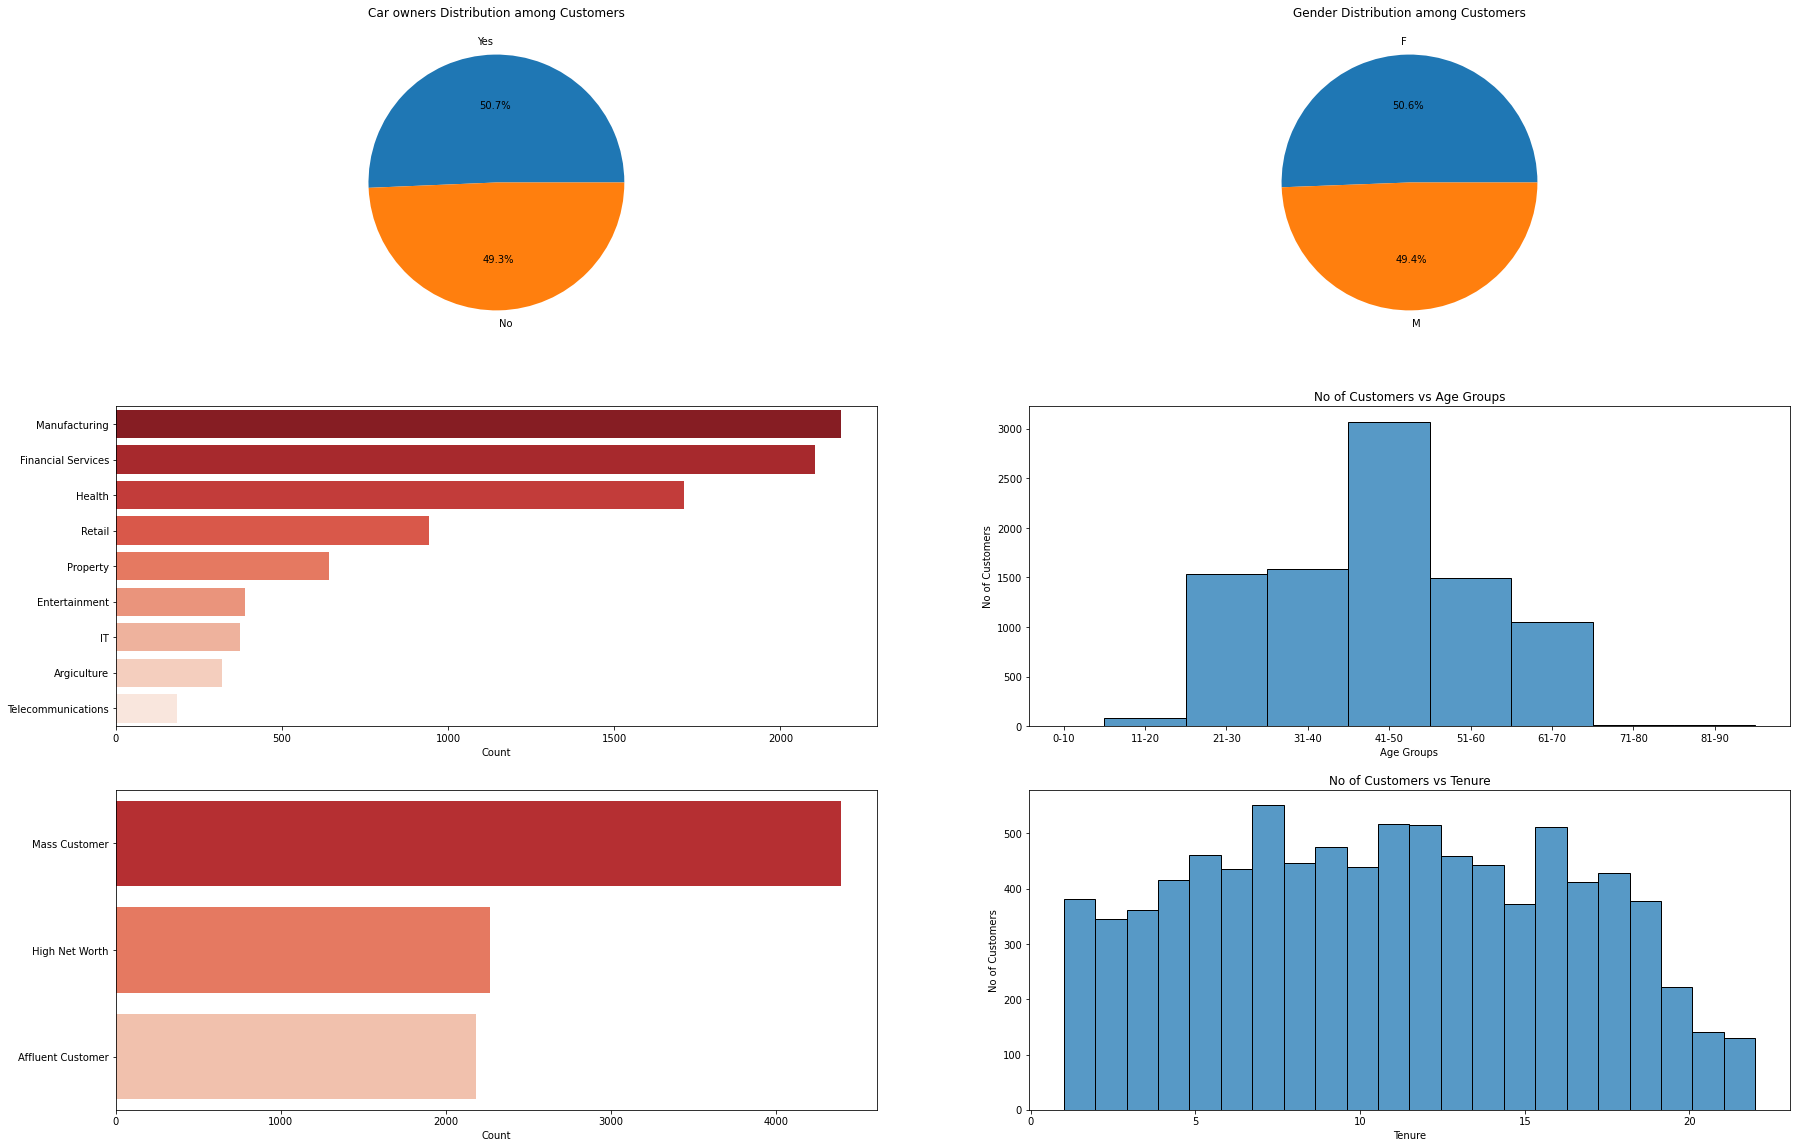

In [152]:
plt.figure(figsize=(30,20))
plt.subplot(3,2,1)
CAR = df_init.owns_car.value_counts(normalize=True).rename_axis('car').reset_index(name='Count')
plt.pie(data=CAR, x=CAR.Count, labels=CAR.car, autopct='%1.1f%%')
plt.title('Car owners Distribution among Customers')
plt.subplot(3,2,2)
GENDER = df_init.gender.value_counts(normalize=True).rename_axis('gender').reset_index(name='Count')
plt.pie(data=GENDER, x=GENDER.Count, labels=GENDER.gender, autopct='%1.1f%%')
plt.title('Gender Distribution among Customers')
plt.subplot(3,2,4)
AGE = df_init.Age_Group
sns.histplot(AGE,palette='Blues').set(xlabel='Age Groups', ylabel='No of Customers', title='No of Customers vs Age Groups')
plt.subplot(3,2,3)
JOB = df_init.job_industry_category.value_counts().to_frame('Count')
sns.barplot(JOB.Count,JOB.index,orientation='horizontal',palette='Reds_r')
plt.subplot(3,2,5)
WEALTH = df_init.wealth_segment.value_counts().to_frame('Count')
sns.barplot(WEALTH.Count,WEALTH.index,orientation='horizontal',palette='Reds_r')
plt.subplot(3,2,6)
AGE = df_init.tenure
sns.histplot(AGE,palette='Blues').set(ylabel='No of Customers', xlabel='Tenure', title='No of Customers vs Tenure')
plt.show()

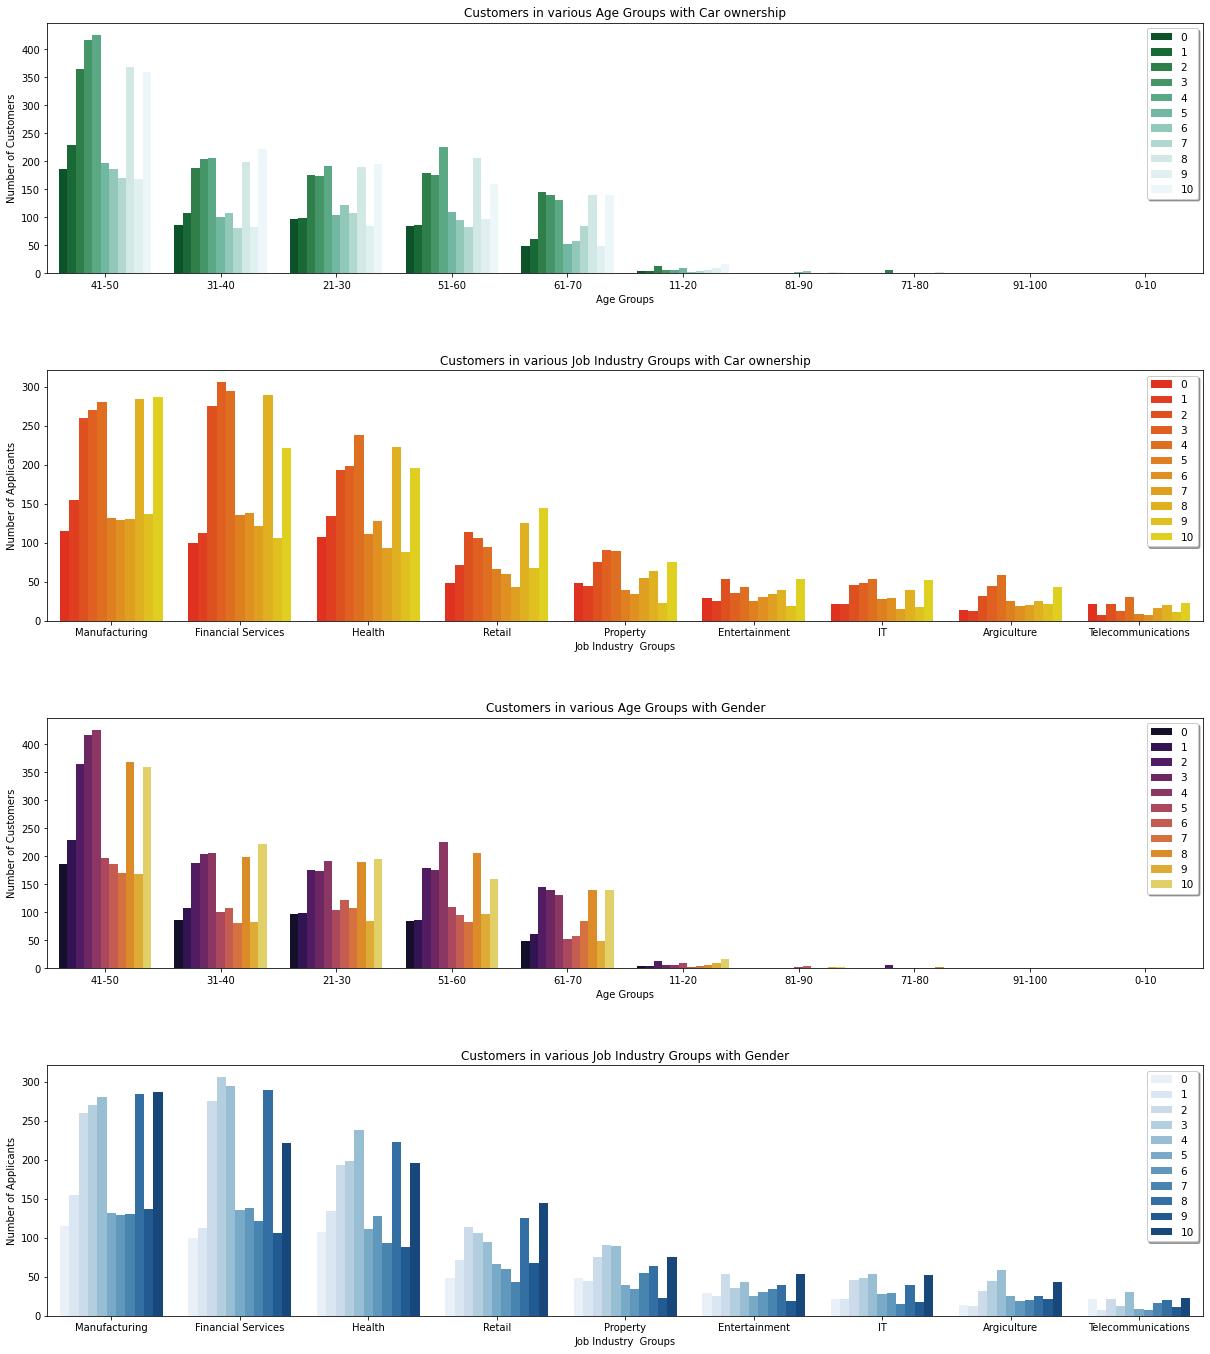

In [130]:
plt.figure(figsize=[18,20])
plt.yscale('log')
plt.subplot(411)
sns.countplot(data = df_init, x='Age_Group' , order=df_init['Age_Group'].value_counts().index,hue = df_init['Cluster'],palette='BuGn_r',orient='h').set(xlabel='Age Groups', ylabel='Number of Customers', title='Customers in various Age Groups with Car ownership')
plt.legend(loc='upper right', shadow=True,prop={'size':10.5})
plt.subplot(412)
sns.countplot(data = df_init, x='job_industry_category' , order=df_init['job_industry_category'].value_counts().index,hue = df_init['Cluster'],palette='autumn',orient='h').set(xlabel='Job Industry  Groups', ylabel='Number of Applicants', title='Customers in various Job Industry Groups with Car ownership')
plt.legend( loc='upper right', shadow=True,prop={'size':10.5})
plt.subplot(413)
sns.countplot(data = df_init, x='Age_Group' , order=df_init['Age_Group'].value_counts().index,hue = df_init['Cluster'],palette='inferno',orient='h').set(xlabel='Age Groups', ylabel='Number of Customers', title='Customers in various Age Groups with Gender')
plt.legend( loc='upper right', shadow=True,prop={'size':10.5})
plt.subplot(414)
sns.countplot(data = df_init, x='job_industry_category' , order=df_init['job_industry_category'].value_counts().index,hue = df_init['Cluster'],palette='Blues',orient='h').set(xlabel='Job Industry  Groups', ylabel='Number of Applicants', title='Customers in various Job Industry Groups with Gender')
plt.legend( loc='upper right', shadow=True,prop={'size':10.5})
plt.tight_layout(5.0)
plt.show()

# Verdict


In [136]:
test = pd.read_csv('/content/new_customers.csv',header=1)

In [137]:
test.head(3)

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227,Unnamed: 228,Unnamed: 229,Unnamed: 230,Unnamed: 231,Unnamed: 232,Unnamed: 233,Unnamed: 234,Unnamed: 235,Unnamed: 236,Unnamed: 237,Unnamed: 238,Unnamed: 239,Unnamed: 240,Unnamed: 241,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251,Unnamed: 252,Unnamed: 253,Unnamed: 254,Unnamed: 255
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6.0,0.63,0.7875,0.984375,0.836719,1,1,1.71875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11.0,0.84,0.8400,1.050000,0.892500,1,1,1.71875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5.0,0.41,0.4100,0.410000,0.410000,1,1,1.71875,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
cols = test.columns
drop_col = []
for col in cols:
  if col.startswith('Unnamed'):
    drop_col.append(col)

In [146]:
test.drop(labels=drop_col,axis=1,inplace=True)

In [147]:
test.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Rank', 'Value'],
      dtype='object')

In [148]:
test.DOB = pd.to_datetime(cust_demo['DOB'])
test['DOB_year'] = test['DOB'].dt.year
test['DOB_month'] = test['DOB'].dt.month
test['DOB_date'] = test['DOB'].dt.day

In [149]:
test['Age'] = 2021 - test['DOB_year']

In [150]:
df_train.columns

AttributeError: ignored